**ENUNCIADO**

HINA Inc. es una gran empresa de productos de gran consumo que está racionalizando su presupuesto de marketing. Esto, a su vez, significa reevaluar la eficacia de su gasto actual en diversos canales de marketing. Como analista, debe averiguar si el gasto en campañas publicitarias en televisión se traduce en un aumento directo de las ventas. En otras palabras, tiene que averiguar si el gasto en publicidad televisiva y las cifras de ventas comparten una misma relación.

Recuerde que disponemos de datos publicitarios históricos (ventas semanales y gasto en cada canal) de casi los cuatro años anteriores en el archivo advertising.csv.

**ETAPA 1: ENTENDIMIENTO DEL NEGOCIO**

*Empresa de muchos productos de gran consumo

*Se quiere racionalizar, optimizar y reducir el presupuesto de marketing *Evaluar la efectividad de los canales de marketing y saber cual es el canal más eficaz.

*Averiguar si el canal TV aumenta directamente las ventas, definir si se tiene una correlación positiva entre estas variables

*Tenemos datos de ventas y gastos semanales de 4 años

*Vamos a aplicar un modelo de ML para encontrar un patrón o una relación, para modelar el comportamiento de estas variables y ver si la relación es directa o no y si el modelo tiene una correlación positiva

*Será un ML Supervisado porque tenemos gastos y ventas y vamos a buscar la correlación entre estas

*Podemos aplicar Regresión Lineal Simple para ver el comportamiento del gasto TV en las ventas

*y la Regresión Lineal Múltiple para ver el comportamiento de todo el gasto en marketing

**ETAPA 2:** Entendimiento de los datos

a) importar las librerías

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model #librería para hacer regresiones líneales
from sklearn import model_selection #librería para hacer regresiones líneales
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #librería para métricas y evaluar los modelos

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

b) cargar los datos

In [5]:
path = '/advertising.csv'
data = pd.read_csv(path)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Tenemos 4 variables: 3 pertenecen a los gatos en inversión publicitaria de diferentes canales (TV, radio y newspaper) y  la variable objetivo de ventas semanales

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Tenemos efectivamente 4 variables flotantes con 200 registros, donde ninguna variable tiene nulos

C) Análisis Univariable

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


La mayor inversión en marketing la realizan en TV. Y esta variable tiene la media y el cuatil 50% muy cercanos

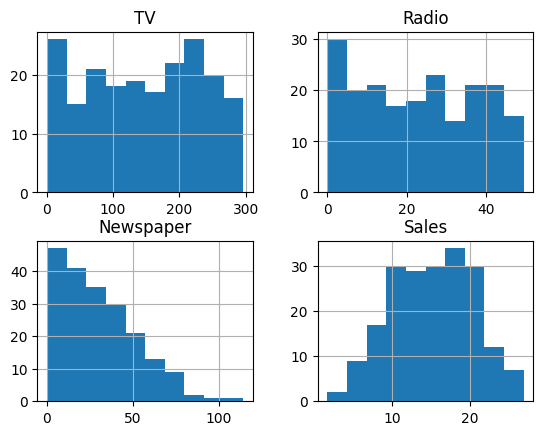

In [8]:
data.hist()
plt.show();

La variable TV y Radio tiene una distribución uniforme. Newpapaer tiene una distribución asimétrica positiva y la variable sales tiene una distribución normal.

<Axes: >

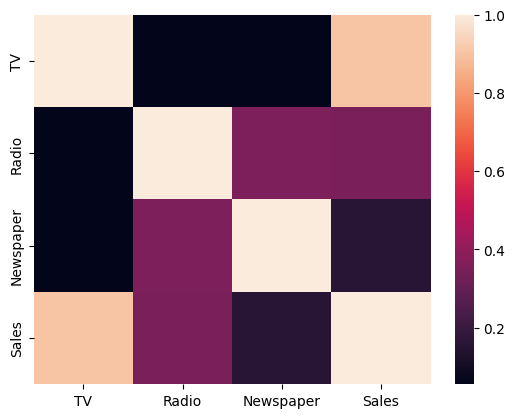

In [9]:
sns.heatmap(data.corr())

De los canales de marketing, vemos que el Newspaper tiene una correlación con la ventas igual o menor al 20%. La radio tiene una correlación con las ventas de aproximadamente el 40%. Mientras que la TV, tiene la correlación más alta entre los canales con las ventas mayor al 90%

d) Análisis Bivariable

<Axes: xlabel='Newspaper', ylabel='Sales'>

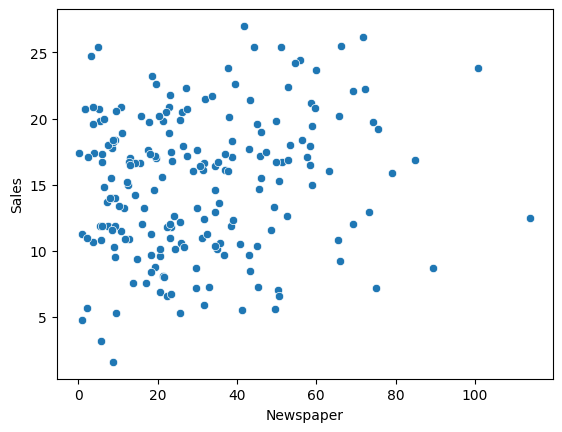

In [10]:
sns.scatterplot(data=data, x='Newspaper', y='Sales')

No se ve una tendencia positiva o negativa donde los gastos en NewsPaper influyan en las ventas

<Axes: xlabel='Radio', ylabel='Sales'>

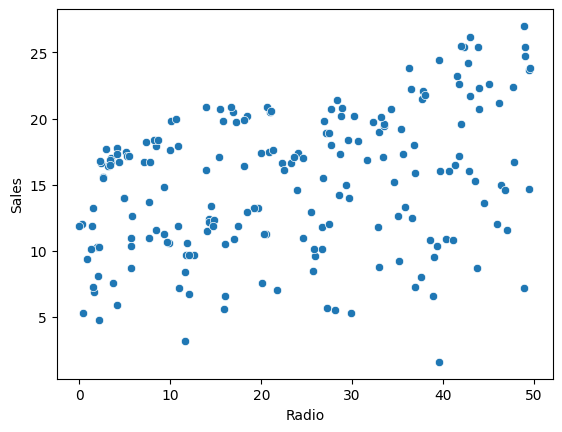

In [11]:
sns.scatterplot(data=data, x='Radio', y='Sales')

hay una leve tendencia positiva donde la inversión en Radio influye en las ventas, pero tenemos unos puntos que confunden porque a pesar de realizar la mayor cantidad de inversión, las ventas son muy bajas

<Axes: xlabel='TV', ylabel='Sales'>

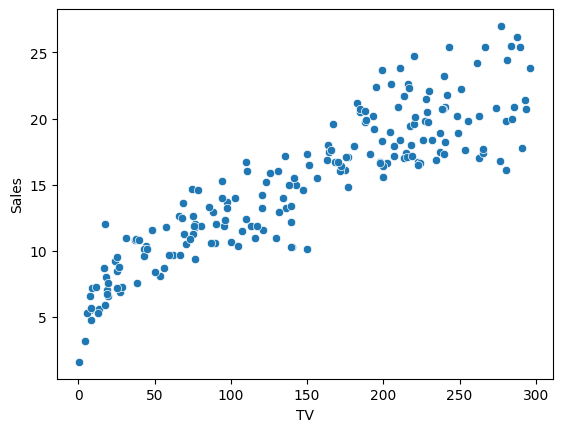

In [ ]:
sns.scatterplot(data=data, x='TV', y='Sales')

A medida que aumentamos el gasto en TV las ventas sí aumentan, tenemos una tendencia positiva notoria.

REGRESIÓN LINEAL SIMPLE
v.o= Sales
v.i= TV (gastos en tv)

**ETAPA 3: Preparación de los datos: (elegimos las variables y split):**


In [12]:
#Creamos una dataframe con las variables seleccionadas para este modelo
rlsimple=data[['TV','Sales']].copy()

In [13]:
#Definir las variables
x=rlsimple[['TV']]
y=rlsimple[['Sales']]

In [18]:
#Separar en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [19]:
X_train.shape

(140, 1)

**ETAPA 4: Modelamiento**


In [22]:
#Instanciamos el modelo
reg = linear_model.LinearRegression()

In [23]:
#Entrenamos el modelo
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
#Predicciones con datos de prueba para la evaluación
sales_pred=reg.predict(X_test)
sales_pred

array([[19.62873176],
       [ 7.91903215],
       [19.23262052],
       [14.47385937],
       [ 8.35855285],
       [ 8.26630777],
       [10.64840143],
       [17.6264708 ],
       [ 9.0476779 ],
       [ 9.31898697],
       [17.69701116],
       [10.73522033],
       [11.77162099],
       [14.01806012],
       [18.02800823],
       [16.81254358],
       [11.63596646],
       [11.55457374],
       [12.9111191 ],
       [ 9.9538502 ],
       [22.79762174],
       [20.38297099],
       [19.35742269],
       [16.93734575],
       [10.58328725],
       [22.42321522],
       [19.78609103],
       [19.27602997],
       [20.10080955],
       [15.76529056],
       [16.93734575],
       [ 7.83763943],
       [21.15891494],
       [18.71713328],
       [ 8.61358338],
       [18.66829764],
       [21.1697673 ],
       [15.83040473],
       [11.04993886],
       [19.92174556],
       [18.27761258],
       [11.99952062],
       [ 7.32757837],
       [14.38704046],
       [16.19938507],
       [20

In [28]:
y_test.head()

,Sales
165,16.9
189,6.7
48,19.8
186,10.3
72,8.8


In [26]:
data.iloc[[165]]

,TV,Radio,Newspaper,Sales
165,234.5,3.4,84.8,16.9


El primer registro en la predicción marca ventas de 19.23 y el dato real del registro correspondiente es de 16.9. Están cercanos

In [30]:
sales_pred.shape

(60, 1)

Para ver el modelo graficamente vamos a predecir el total de registros para que se visualice el total de puntos reales como el total de puntos en el modelo

In [33]:
#Prediccones con la totalidad de los datos
sales_pre=reg.predict(data[['TV']])

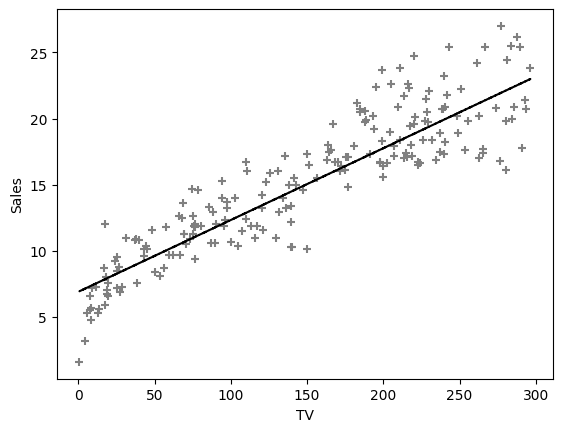

In [34]:
#Veamos gráficamente el modelo
plt.plot(data.TV, sales_pre,"k--")
plt.scatter(data.TV, data.Sales,\
           marker='+', color='gray')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

**ETAPA 5: Evaluación del modelo**

Interpretar los valores de los parametros de la ecuación de la línea recta

x= gastos en tv

y= ventas

m = pendiente de la recta

b = intercepto de la recta


In [35]:
#pendiente
reg.coef_

array([[0.05426181]])

Por cada peso (1) de gastos en TV las ventas aumentan en 0.054

In [36]:
#intercepto
reg.intercept_

array([6.90433622])

Cuando los gastos en TV son cero (0) quiere decir que vamos a tener ventas de 6.9

Así invirtamos cero pesos en TV vamos a tener por lo menos 6.9 pesos en ventas

In [39]:
mean_squared_error(sales_pred,y_test)

6.333851953861685

Con este modelo podemos llegar a tener hasta una desviación en la predicción de ventas de 6.33 pesos con relación a la realidad

In [38]:
r2_score(y_test,sales_pred)*100

77.95440916427651

La precisión de este modelo es del 77.95. Se considera bueno por las condiciones de este negocio